In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

In [2]:
# READING DATASET
dataframe = pd.read_csv("/content/Superstoredataset.csv",encoding='windows-1254')

In [3]:
# PREPROCESSING OF DATA AND EXPLORATORY DATA ANALYSIS
# DIMENSIONS OF DATASET
dataframe.shape

(9994, 21)

In [4]:
# PEEK AT THE DATA
dataframe.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
dataframe.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [6]:
dataframe.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
dataframe["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
dataframe=dataframe.drop(columns=['Row ID','Order ID','Order Date', 'Ship Date','Customer ID', 'Customer Name','Product ID'],axis=1)
dataframe.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
dataframe.shape

(9994, 14)

In [10]:
dataframe=dataframe.drop(columns=["Postal Code"],axis=1)

In [11]:
# SUMMARY OF THE DATA
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Product Name  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [12]:
# STASTICAL SUMMARY OF DATA
dataframe.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [13]:
# DATA TYPES
dataframe.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [14]:
# NUMBER OF PRODUCTS IN EACH CATEGORIES
dataframe['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [15]:
# TOTAL NUMBER OF PRODUCT IN ALL CATEGORIES
dataframe['Category'].value_counts().sum()

9994

In [16]:
# TOTAL NUMBER OF SUB CATEGORY
dataframe['Sub-Category'].nunique()

17

In [17]:
# TOTAL NUMBER OF PRODUCTS IN EACH SUB CATEGORY
dataframe['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [18]:
# TYPES OF REGION
dataframe["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [19]:
# TYPES OF SHIPMODES
dataframe["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [20]:
# UNIQUE STATES
dataframe["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [21]:
# UNIQUE CITIES
dataframe["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [22]:
# NUMBER OF UNIQUE CATEGORIES IN EACH COLUMN
dataframe.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Product Name    1850
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [23]:
for col in dataframe:
  print(dataframe[col].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 

In [24]:
# NUMBER OF DUPLICATE VALUES
dataframe.duplicated().sum()

20

In [25]:
dataframe.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


<Axes: >

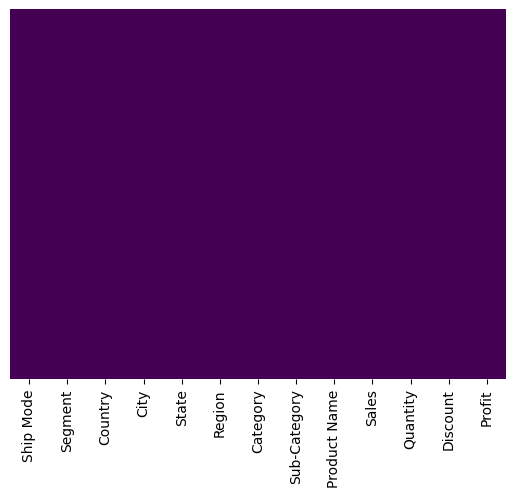

In [26]:
# VISUALISATION OF MISSING VALUES
sns.heatmap(dataframe.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [27]:
# CORELATION AMONG THE COLUMNS(RELATION BETWEEN TWO DIFFERENT VARIABLE)
dataframe.corr()
# BELOW ARE THE 4 NUMERIC COLUMNS IN DATAFRAME

<ipython-input-27-6bb4d17ae680>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [28]:
# COVARIANCE BETWEEN SET OF VARIABLES
dataframe.cov()

<ipython-input-28-9b289455a220>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.cov()


,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


covariance provides the measure of strength of correlation between two variables.

COV(xi,xj)==0 uncorrelated

COV(xi,xj)> 0 +vely correlated

COV(xi,xj)< 0 -vely correlated



In [29]:
# SLICING OF THE DATA
dataframe.iloc[0]

Ship Mode                            Second Class
Segment                                  Consumer
Country                             United States
City                                    Henderson
State                                    Kentucky
Region                                      South
Category                                Furniture
Sub-Category                            Bookcases
Product Name    Bush Somerset Collection Bookcase
Sales                                      261.96
Quantity                                        2
Discount                                      0.0
Profit                                    41.9136
Name: 0, dtype: object

In [30]:
dataframe.iloc[:,0]

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: Ship Mode, Length: 9994, dtype: object

In [31]:
# SUMMARY OF DATASET
dataframe.value_counts()

Ship Mode       Segment      Country        City           State       Region  Category         Sub-Category  Product Name                                                Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  San Francisco  California  West    Office Supplies  Art           4009 Highlighters by Sanford                                19.900   5         0.0        6.5670      2
                Corporate    United States  New York City  New York    East    Furniture        Furnishings   OIC Stacking Trays                                          10.020   3         0.0        4.4088      2
First Class     Corporate    United States  San Diego      California  West    Office Supplies  Labels        Avery 51                                                    18.900   3         0.0        8.6940      2
Standard Class  Consumer     United States  New York City  New York    East    Furniture        Bookcases     O'Sullivan Living Dimensions 5-Shelf Bo

<function matplotlib.pyplot.show(close=None, block=None)>

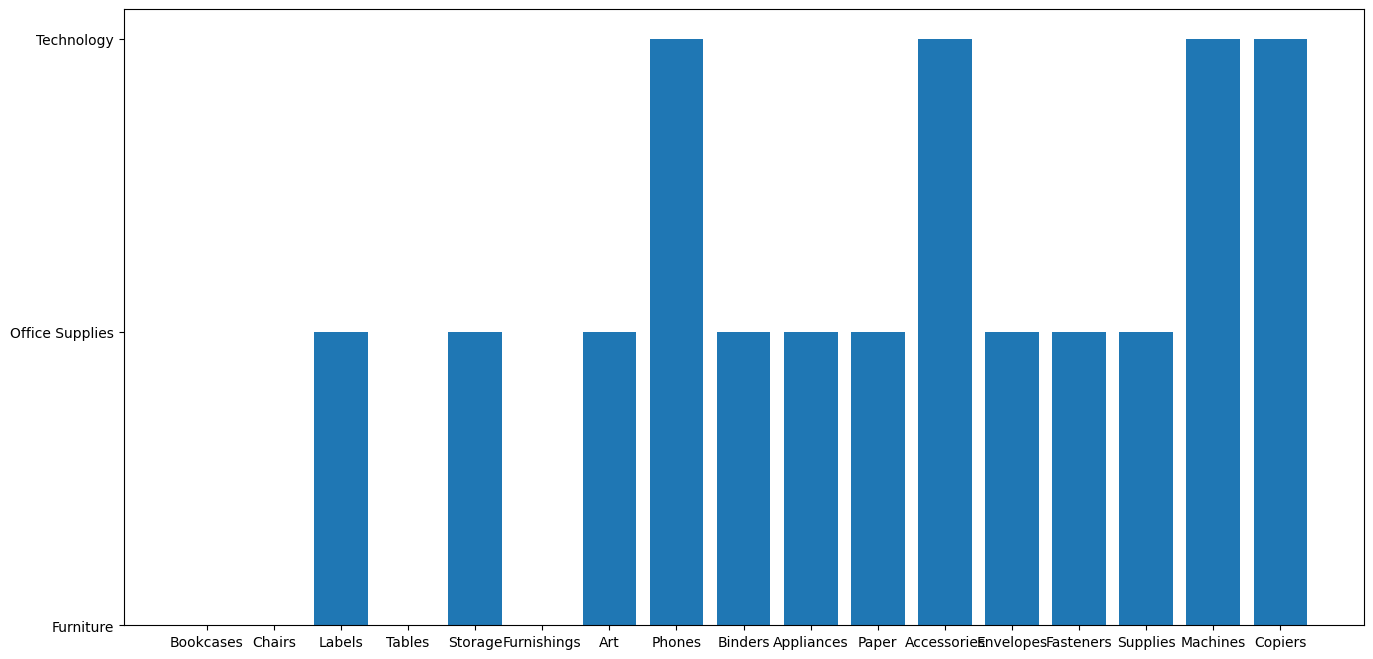

In [32]:
# VISUALIZATION OF DATA
# bar plot between category vs subcategory
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=dataframe)
plt.show

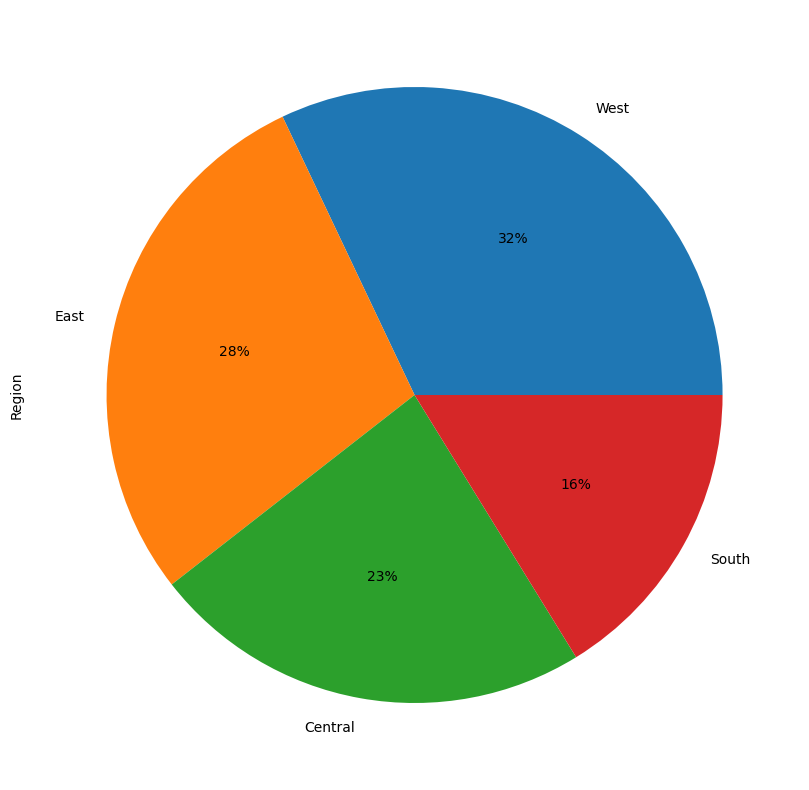

In [43]:
# PIE CHART OF REGION
plt.figure(figsize=(12,10))
dataframe['Region'].value_counts().plot.pie(autopct="%1.0f%%")
plt.show()

In technology the frequency of indivisual item is high(phone,machines)

In office Supplies the frequency of indivisual item is medium(labels,art)

In furniture the frequency of indivisual item is low(chairs,tables)


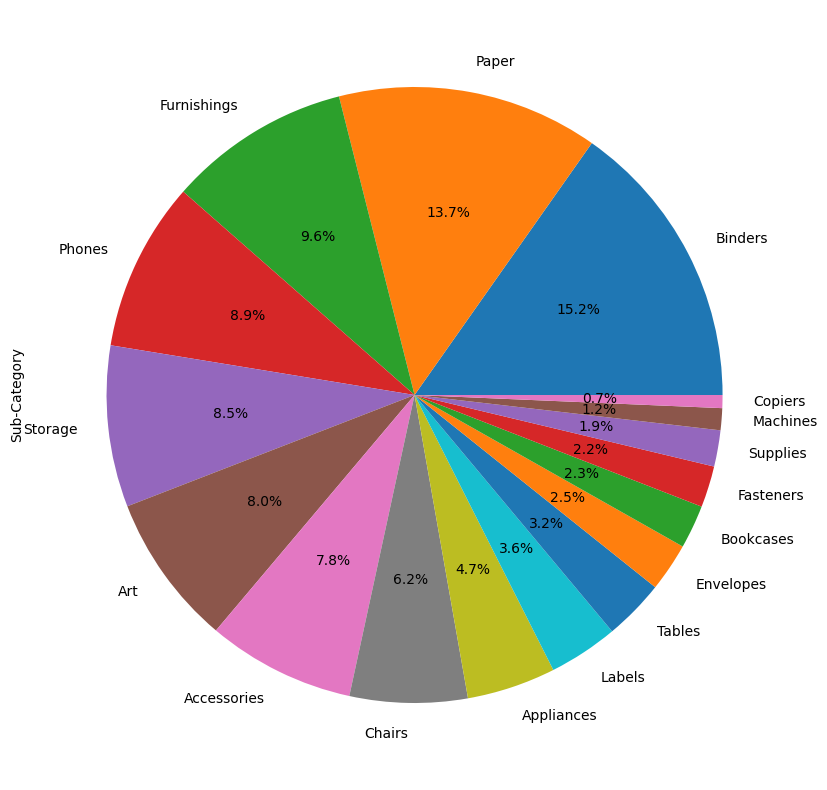

In [40]:
# PIE CHART OF SUB CATEGORY
plt.figure(figsize=(12,10))
dataframe['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<ipython-input-41-bf21715dfca7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataframe.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


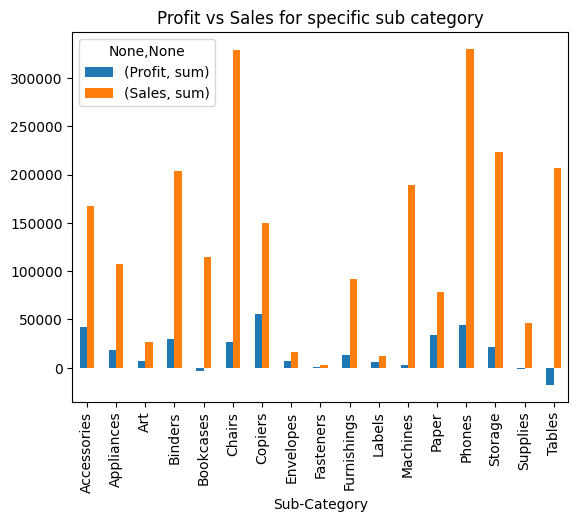

In [41]:
dataframe.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Profit vs Sales for specific sub category')
plt.rcParams['figure.figsize']=[10,8]
plt.show()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

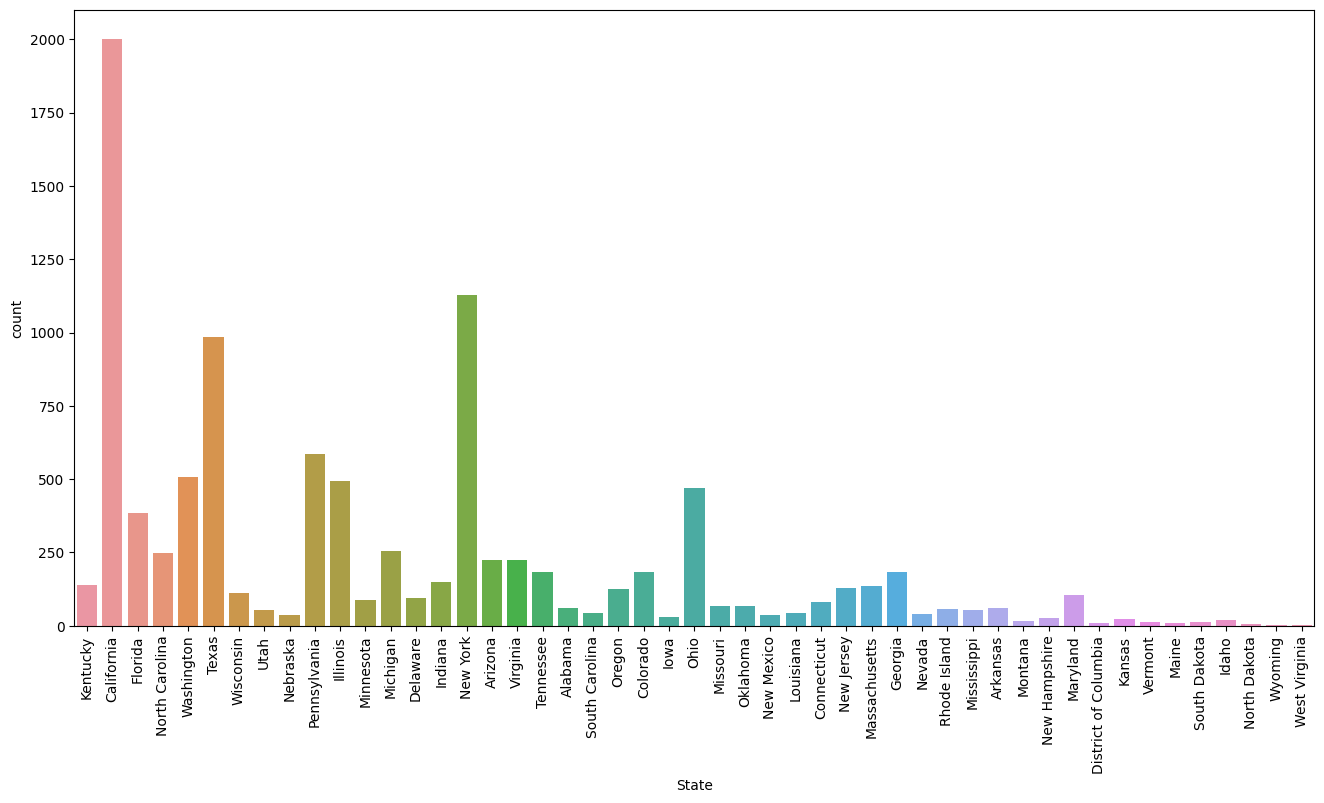

In [42]:
print(dataframe['State'].value_counts())
plt.figure(figsize=(16,8))
sns.countplot(x=dataframe['State'])
plt.xticks(rotation=90)
plt.show()

In [44]:
state_profit=pd.DataFrame(dataframe.groupby("State")["Profit"].sum())
state_profit.reset_index(inplace=True)


In [45]:
state_profit=state_profit.sort_values(by="Profit",ascending=False)
state_profit.head(10)

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


<ipython-input-57-3db7dcb5b322>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataframe.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()


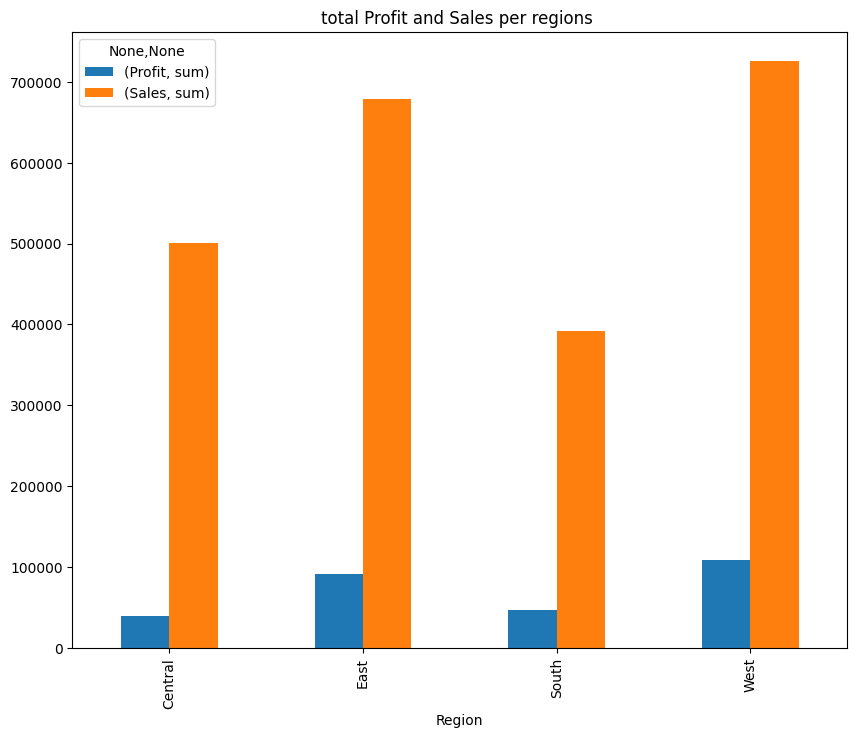

In [57]:
# SALES VS PROFIT PER REGION
dataframe.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('total Profit and Sales per regions ')
plt.rcParams['figure.figsize']=[10,8]
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


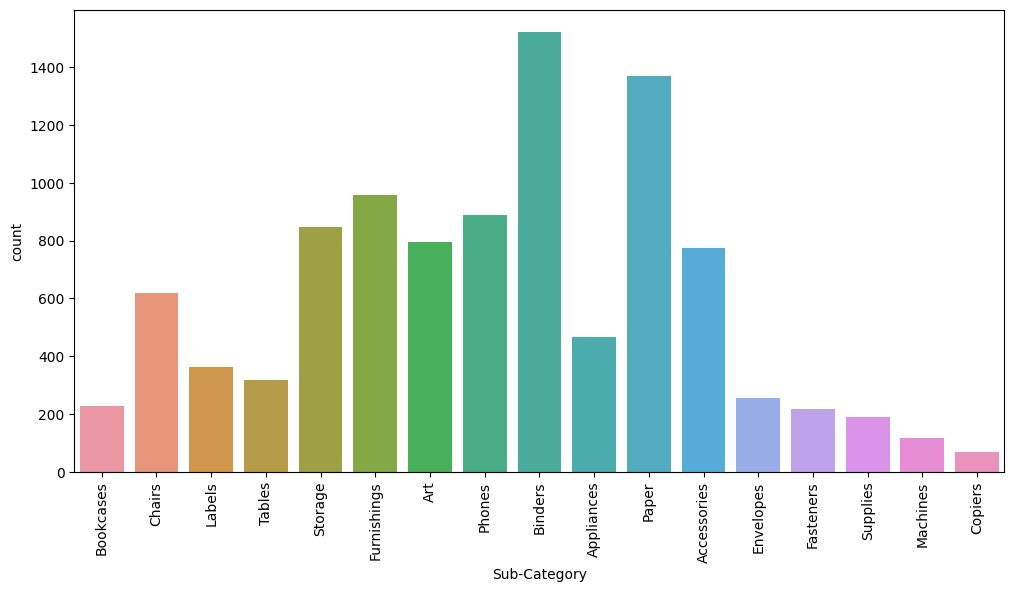

In [53]:
# COUNT PLOT OF SUB CATEGORIES
print(dataframe['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=dataframe['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

<ipython-input-54-9bed45202b6a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(),annot=True)


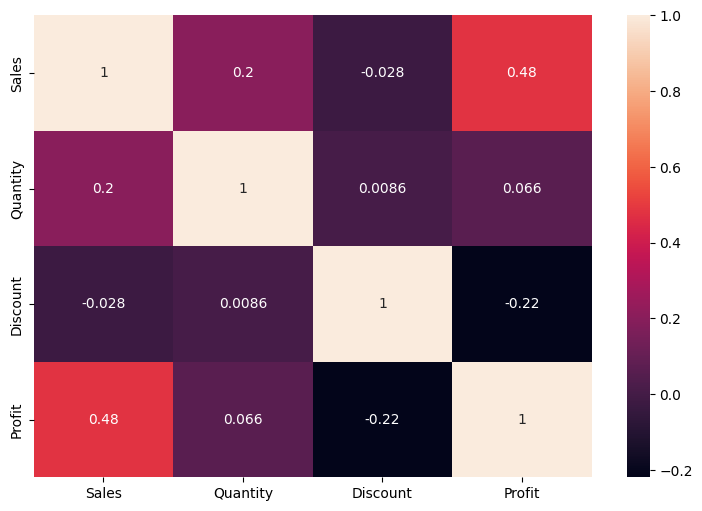

In [54]:
# HEAT MAP OF CORRELATION AMONG THE COLUMNS
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(dataframe.corr(),annot=True)
plt.show()

<ipython-input-55-9776f825ba2e>:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.cov(),annot=True)


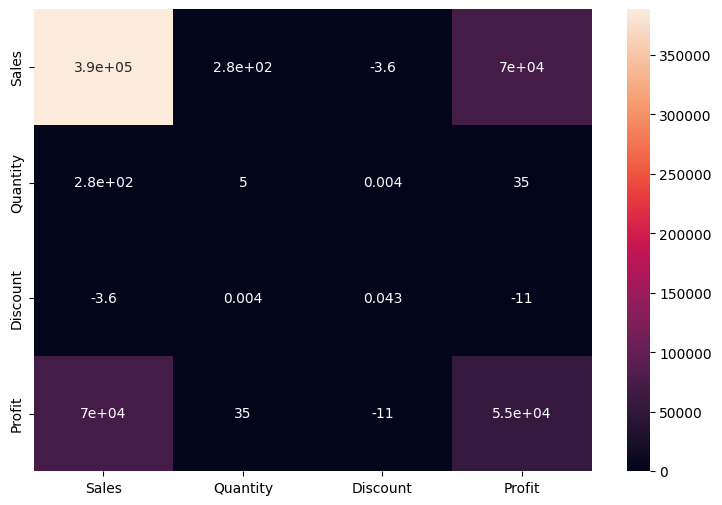

In [55]:
# HEAT MAP OF COVARIANCE AMONG THE SET OF VARIABLES
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(dataframe.cov(),annot=True)
plt.show()

<Axes: xlabel='Segment', ylabel='count'>

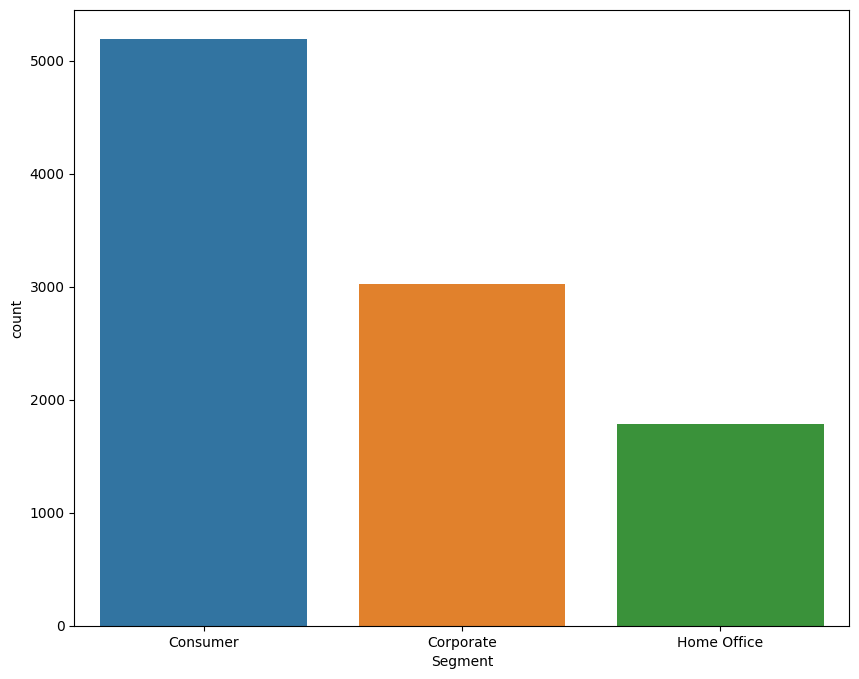

In [56]:
# COUNT PLOT OF SEGMENT
sns.countplot(x=dataframe['Segment'])

<Axes: xlabel='Region', ylabel='count'>

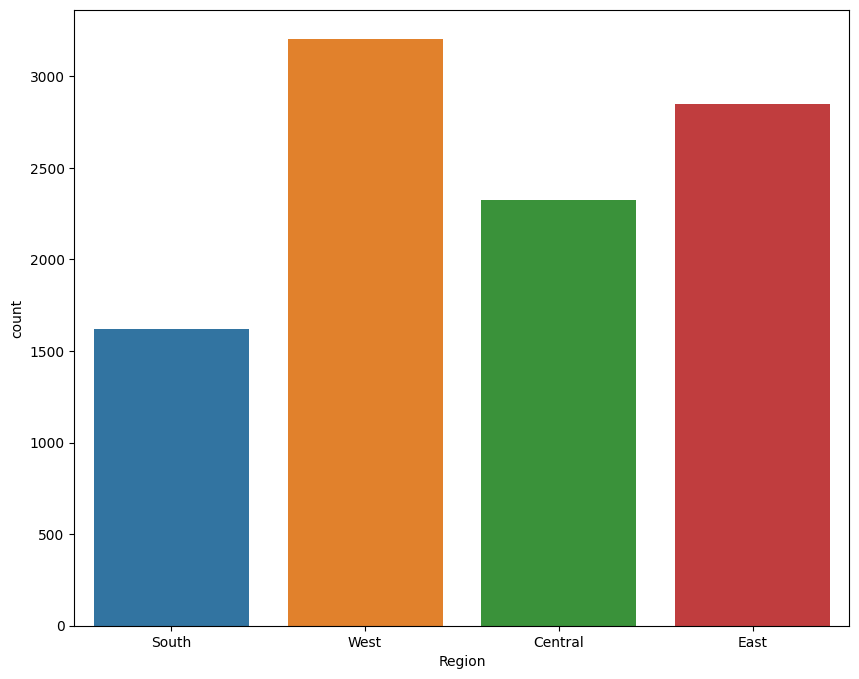

In [58]:
# COUNT PLOT OF REGION
sns.countplot(x=dataframe['Region'])

<Axes: xlabel='Sub-Category', ylabel='Profit'>

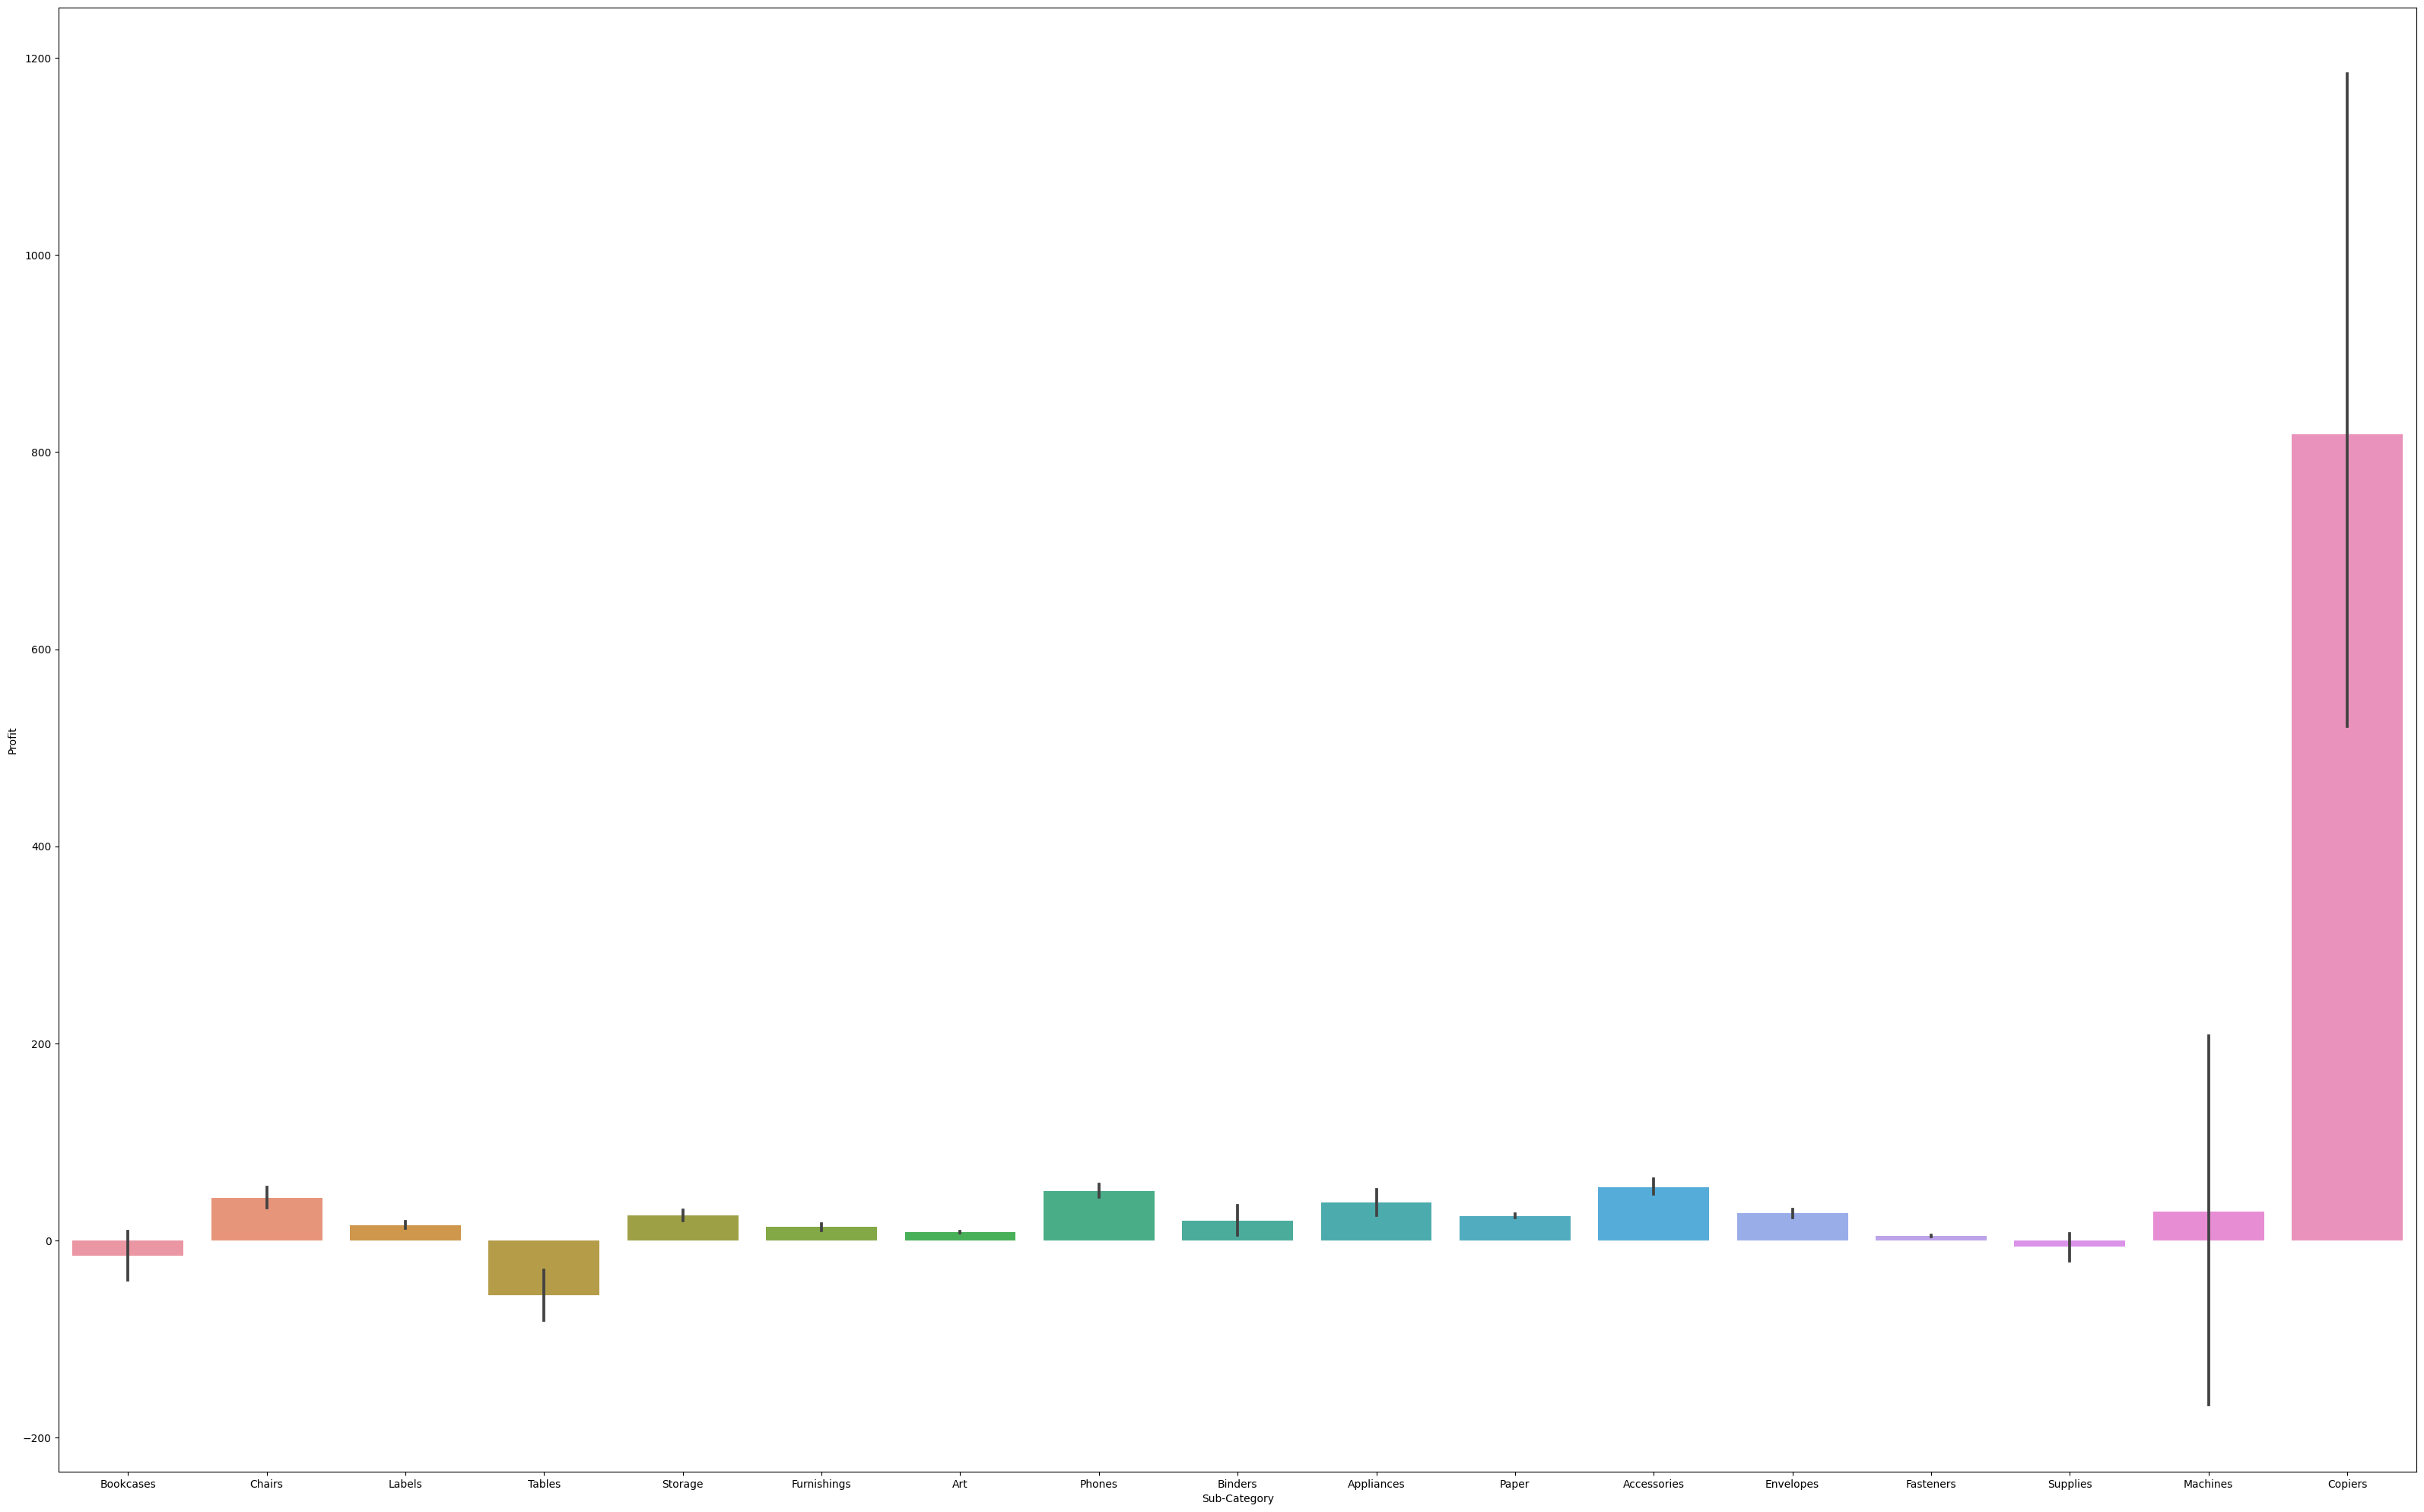

In [59]:
# BAR PLOT OF SUB-CATEGORY VS PROFIT
plt.figure(figsize=(40,25))
sns.barplot(x=dataframe['Sub-Category'],y=dataframe['Profit'])

In [67]:
# which CUSTOMER SEGMENT IS MORE PROFITABLE
segment_analysis = pd.DataFrame(dataframe.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


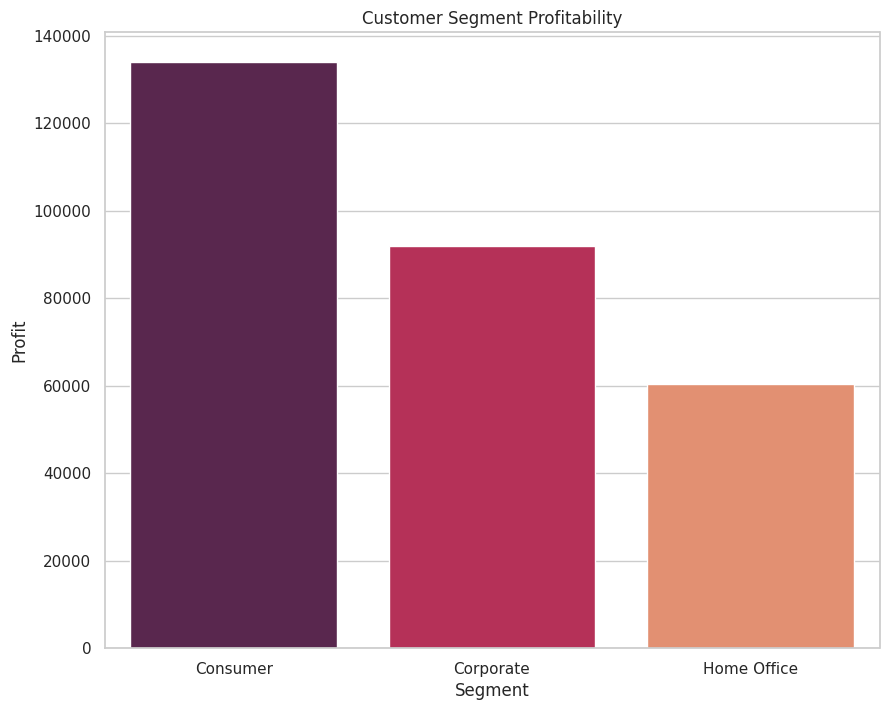

In [68]:
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

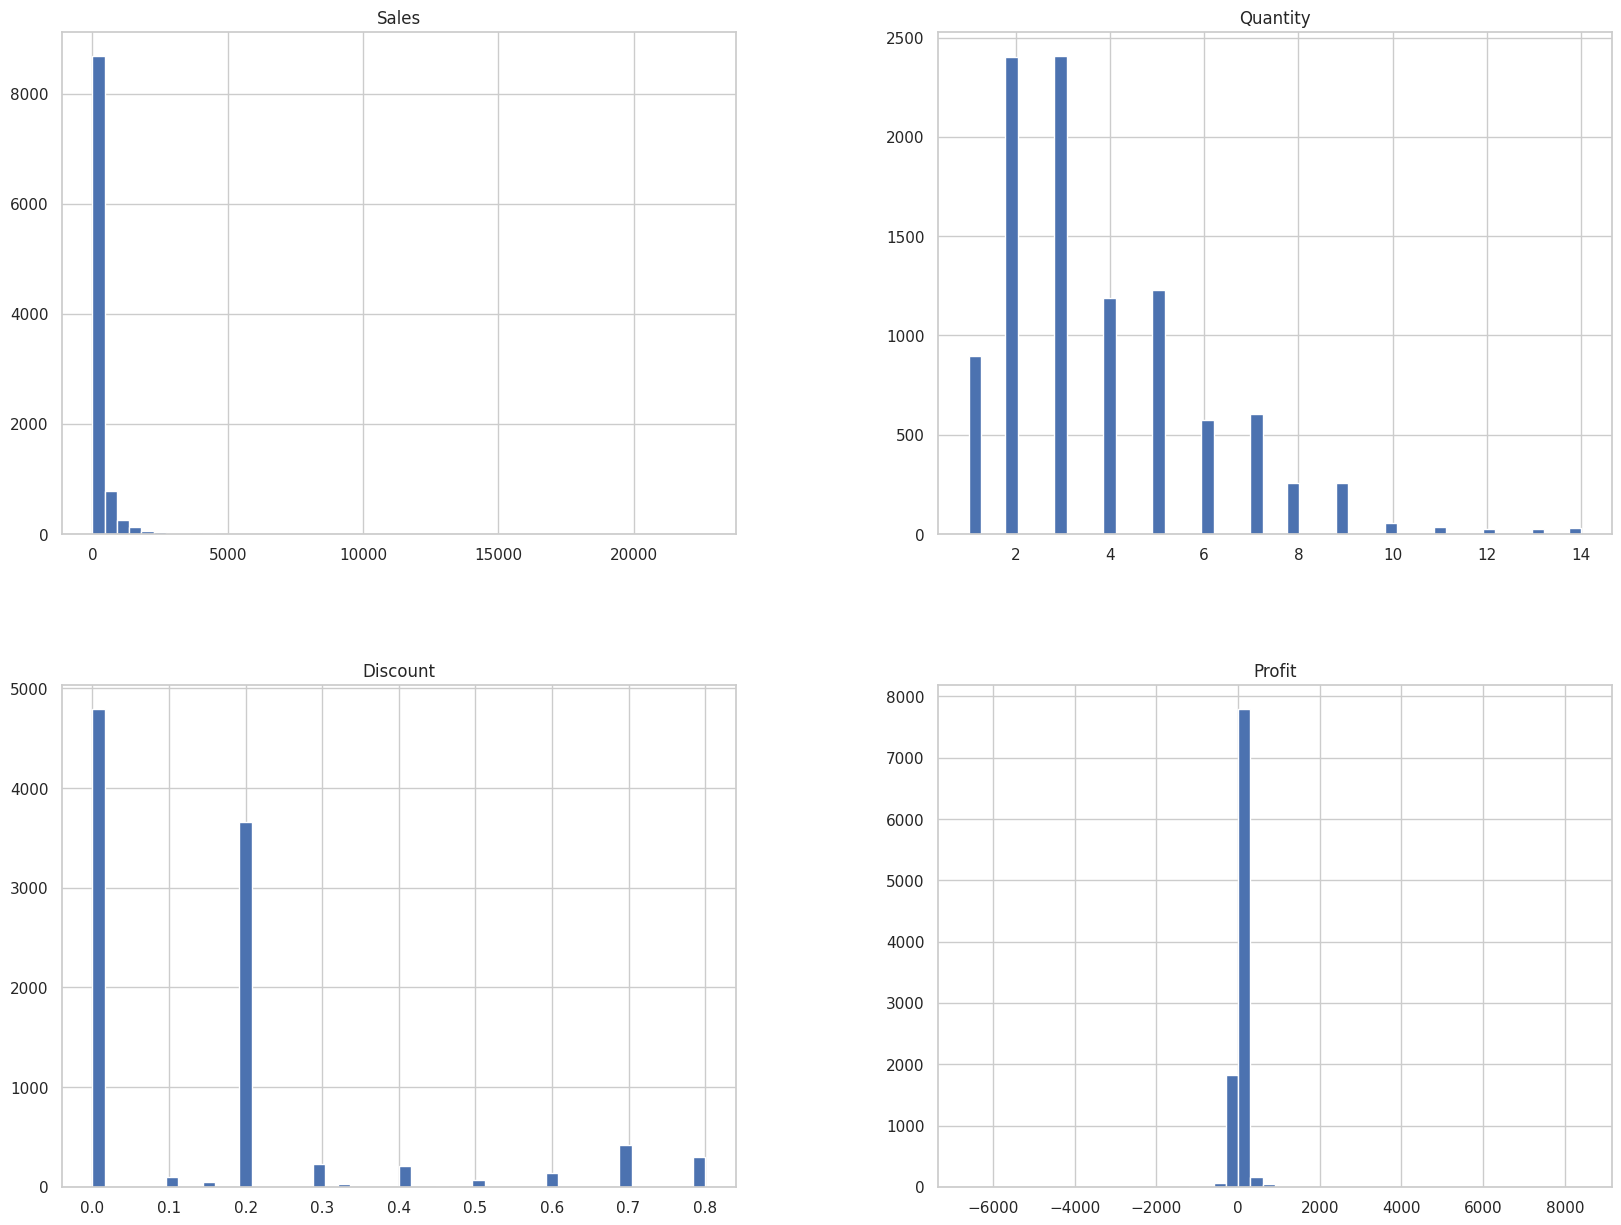

In [71]:
# HISTOGRAM OF DATA
dataframe.hist(bins=50,figsize=(20,15))
plt.show()

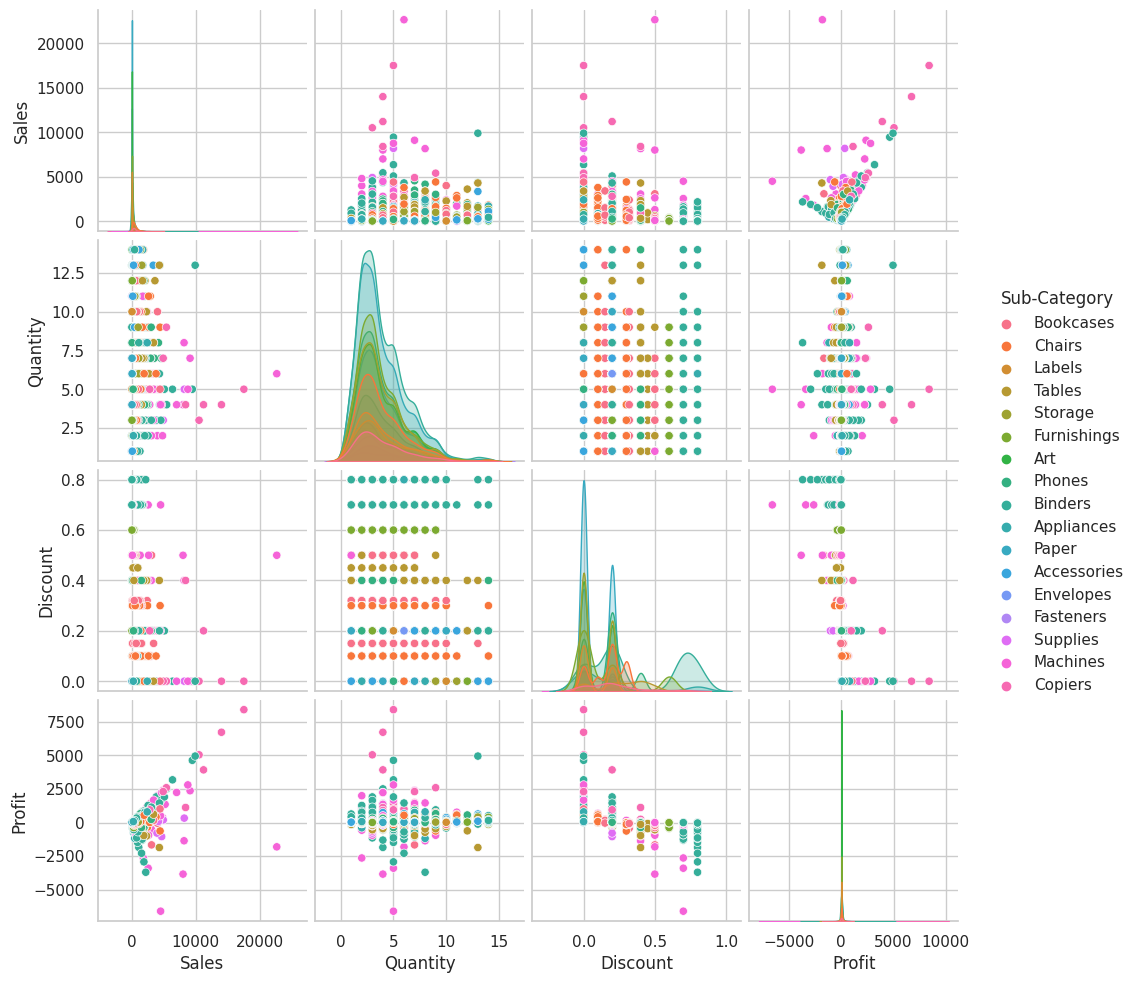

In [73]:
# PAIR PLOT OF SUB CATEGORY
figsize=(15,10)
sns.pairplot(dataframe,hue='Sub-Category')

In [76]:
# SUMMARY OF DATA
group=pd.DataFrame(dataframe.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
group

<ipython-input-76-e9c669396ecf>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group=pd.DataFrame(dataframe.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())


,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


In [77]:
# STATISTICAL SUMMARY OF DATA
dataframe.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


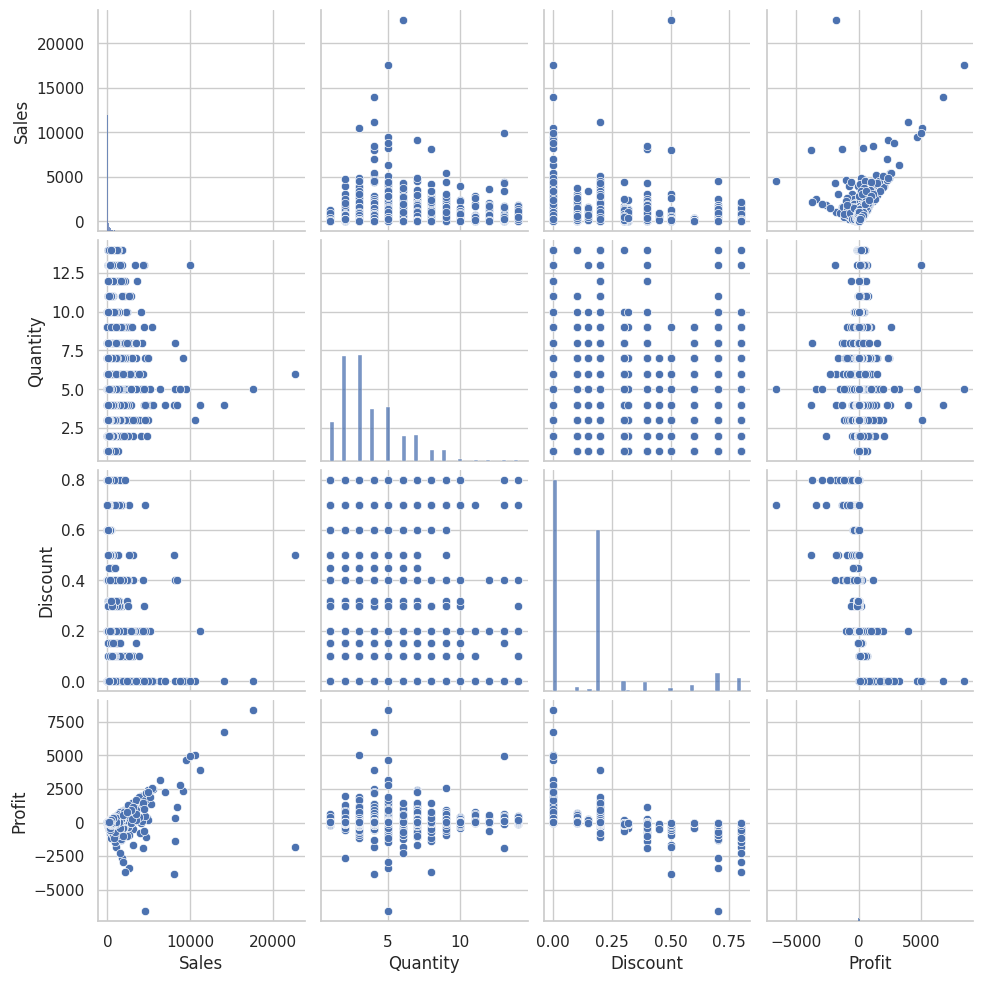

In [78]:
# PAIR PLOT OF DATA
sns.pairplot(dataframe)

<Axes: >

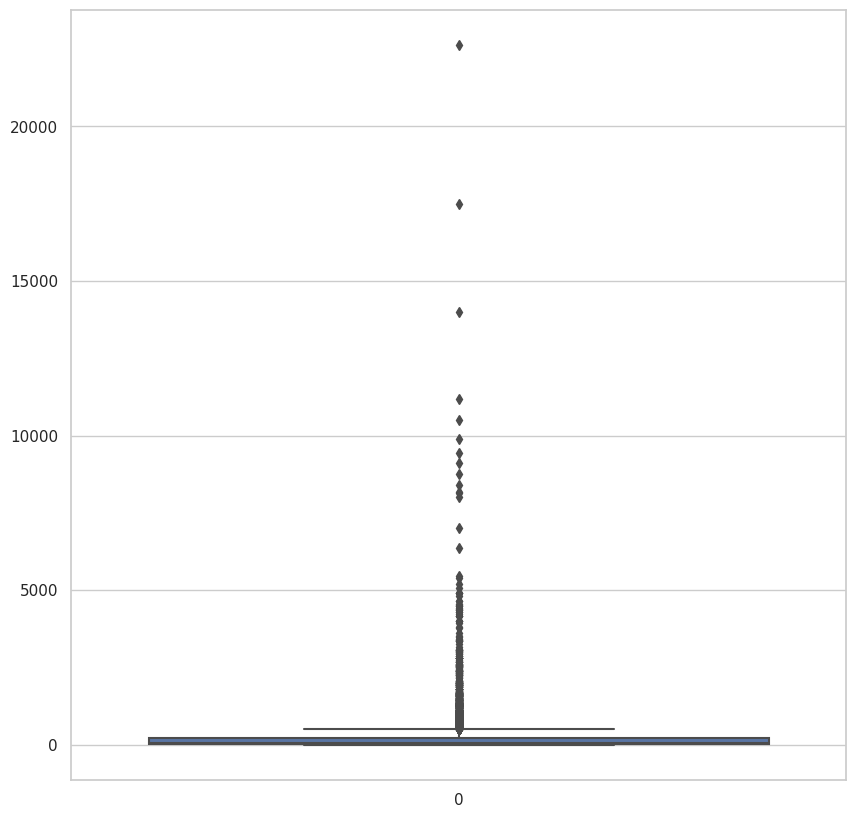

In [89]:
# BOX PLOT OF SALES
fig, axes = plt.subplots(figsize = (10 , 10))
sns.boxplot(dataframe['Sales'])

<Axes: >

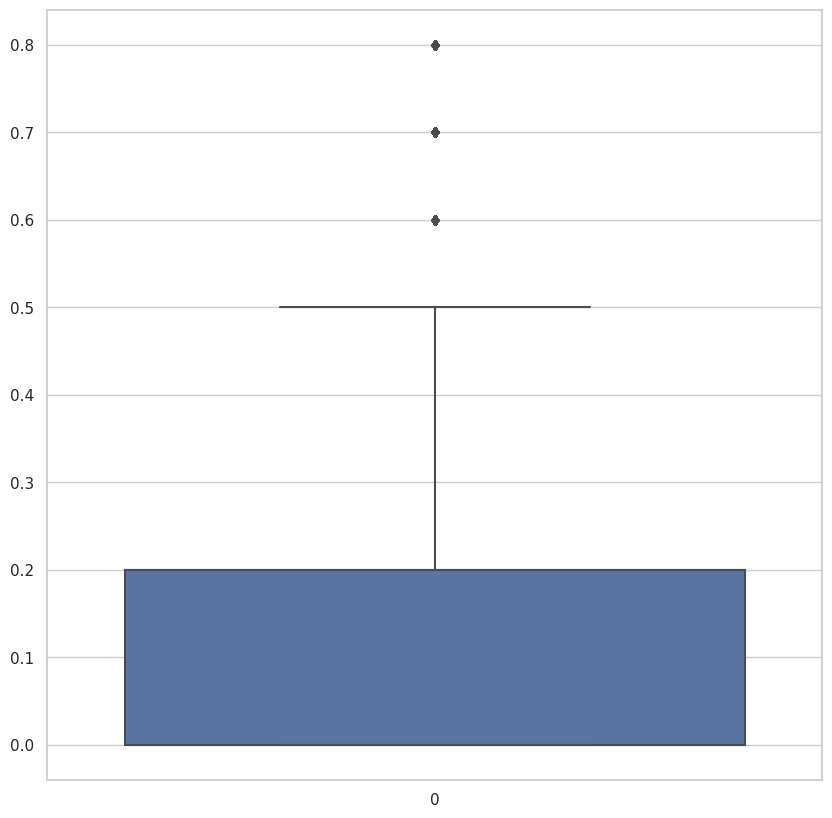

In [84]:
 #BOX PLOT OF DISCOUNT
 fig, axes =plt.subplots(figsize=(10,10))
 sns.boxplot(dataframe['Discount'])

<Axes: >

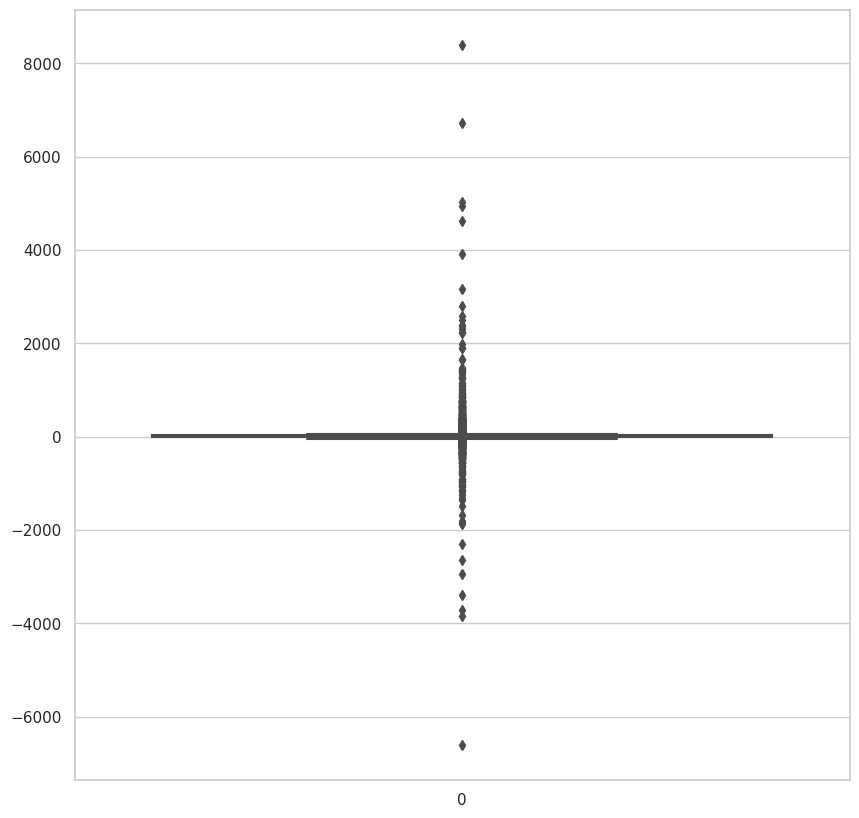

In [85]:
# BOX PLOT OF PROFIT
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(dataframe['Profit'])

In [86]:
# Q is for quartile from the above graph
Q1 = dataframe.quantile(q= 0.25, axis = 0, numeric_only = True,interpolation='linear')

Q3 = dataframe.quantile(q= 0.75, axis = 0, numeric_only = True,interpolation='linear')

In [87]:
IQR = Q3 - Q1
print(IQR)

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


<Axes: xlabel='Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit'>

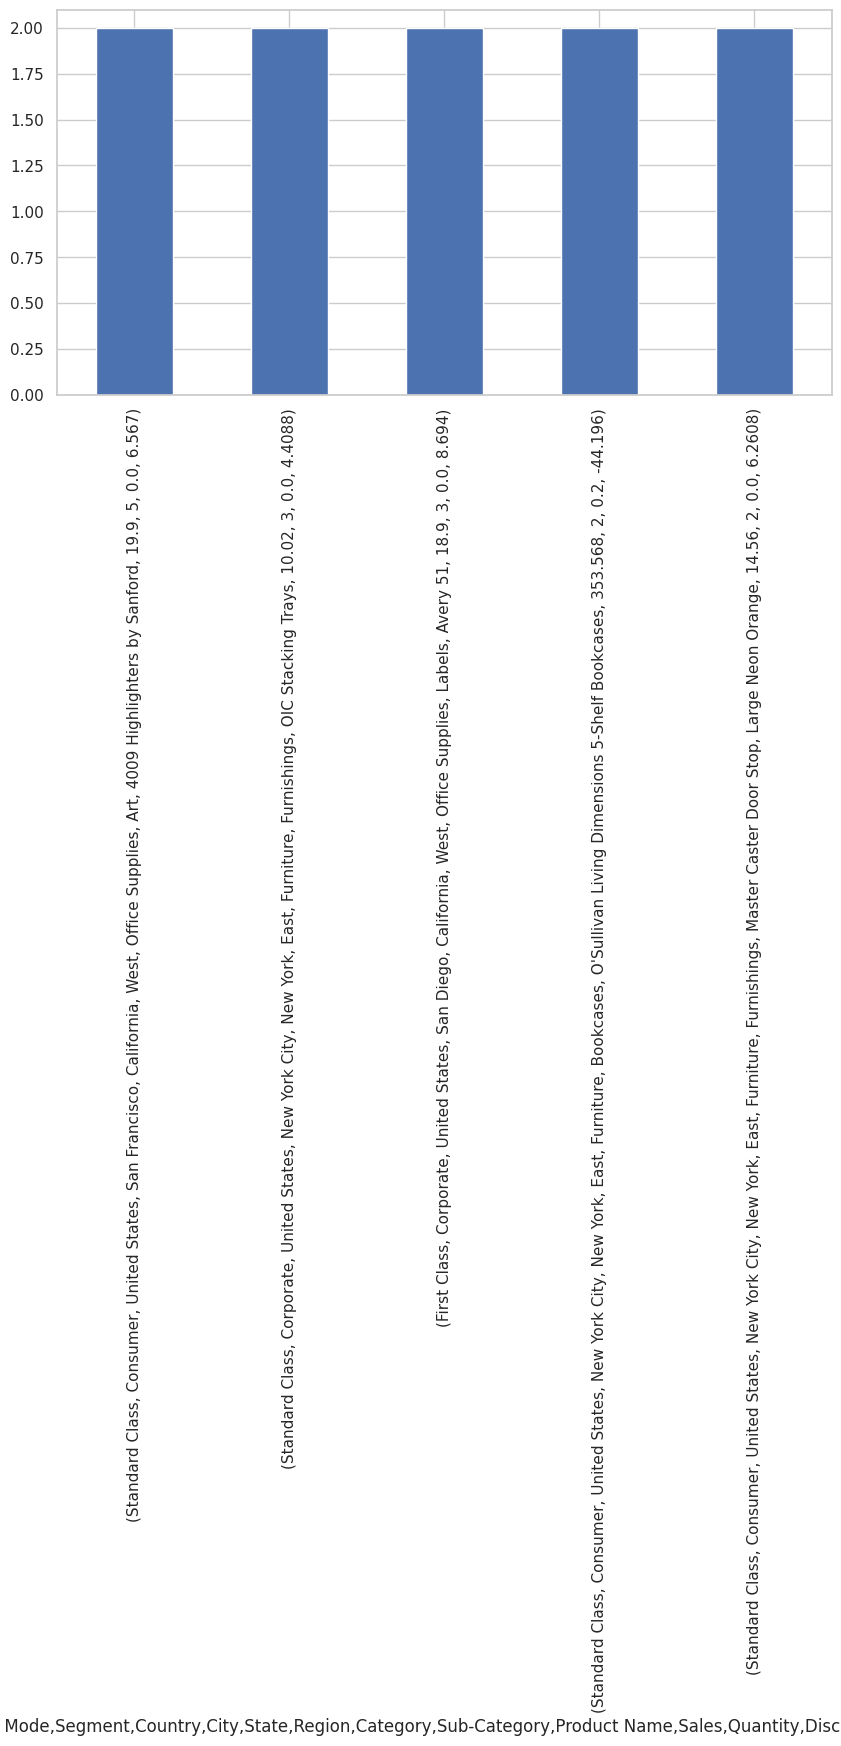

In [92]:
 dataframe.value_counts().nlargest().plot(kind= 'bar', figsize = (10 , 5))

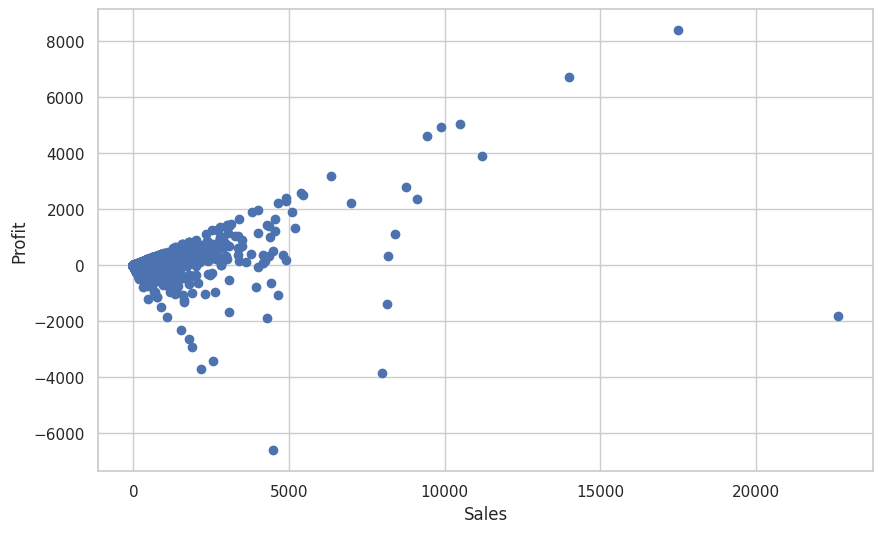

In [96]:
# PLOT OF VALUE COUNTS
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(dataframe["Sales"] ,  dataframe["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


<ipython-input-97-4e4503dbed99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Sales'],color='b',bins=100,hist_kws={'alpha': 0.4});


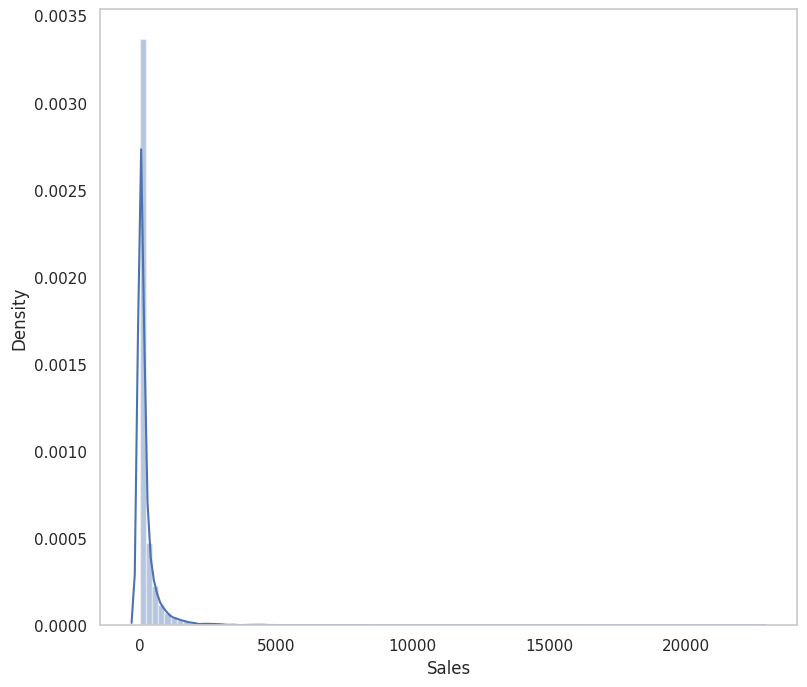

In [97]:
# SALES STATISTICAL DATA
print(dataframe['Sales'].describe())
plt.figure(figsize=(9,8))
plt.grid()
sns.distplot(dataframe['Sales'],color='b',bins=100,hist_kws={'alpha': 0.4});

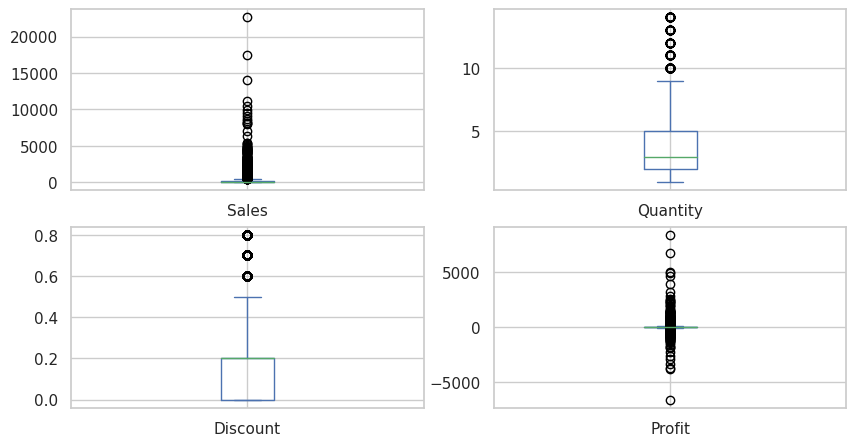

In [99]:
# BOX PLOT OF SALES,QUANTITY,DISCOUNT & PROFIT
dataframe.plot(kind='box',subplots=True,layout=(3,2),sharex=False,sharey=False)
plt.rcParams['figure.figsize']=[14,12]
plt.show()

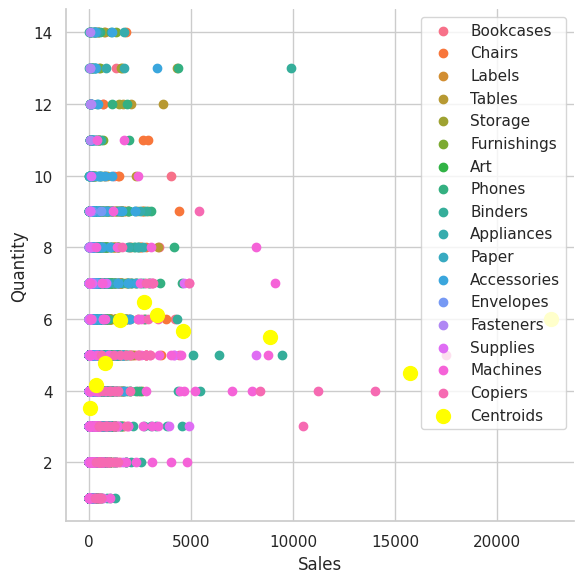

In [104]:
# CLUSTERING OF DATA
x= dataframe.iloc[:,[9,10,11,12]].values
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,n_init = 10,random_state=0).fit(x)
  wcss.append(kmeans.inertia_)

sns.set_style("whitegrid")
sns.FacetGrid(dataframe, hue="Sub-Category",height=6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='yellow',label='Centroids')

plt.rcParams['figure.figsize'] = [10,8]
plt.legend()